<a href="https://colab.research.google.com/github/zadevaibhav45/ml-odel/blob/master/logesticregression_dphi_excersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [50]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [52]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

In [53]:
liver_data = liver_data.fillna(liver_data['Albumin_and_Globulin_Ratio'].value_counts().index[0])

In [54]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Problem                 0
dtype: int64

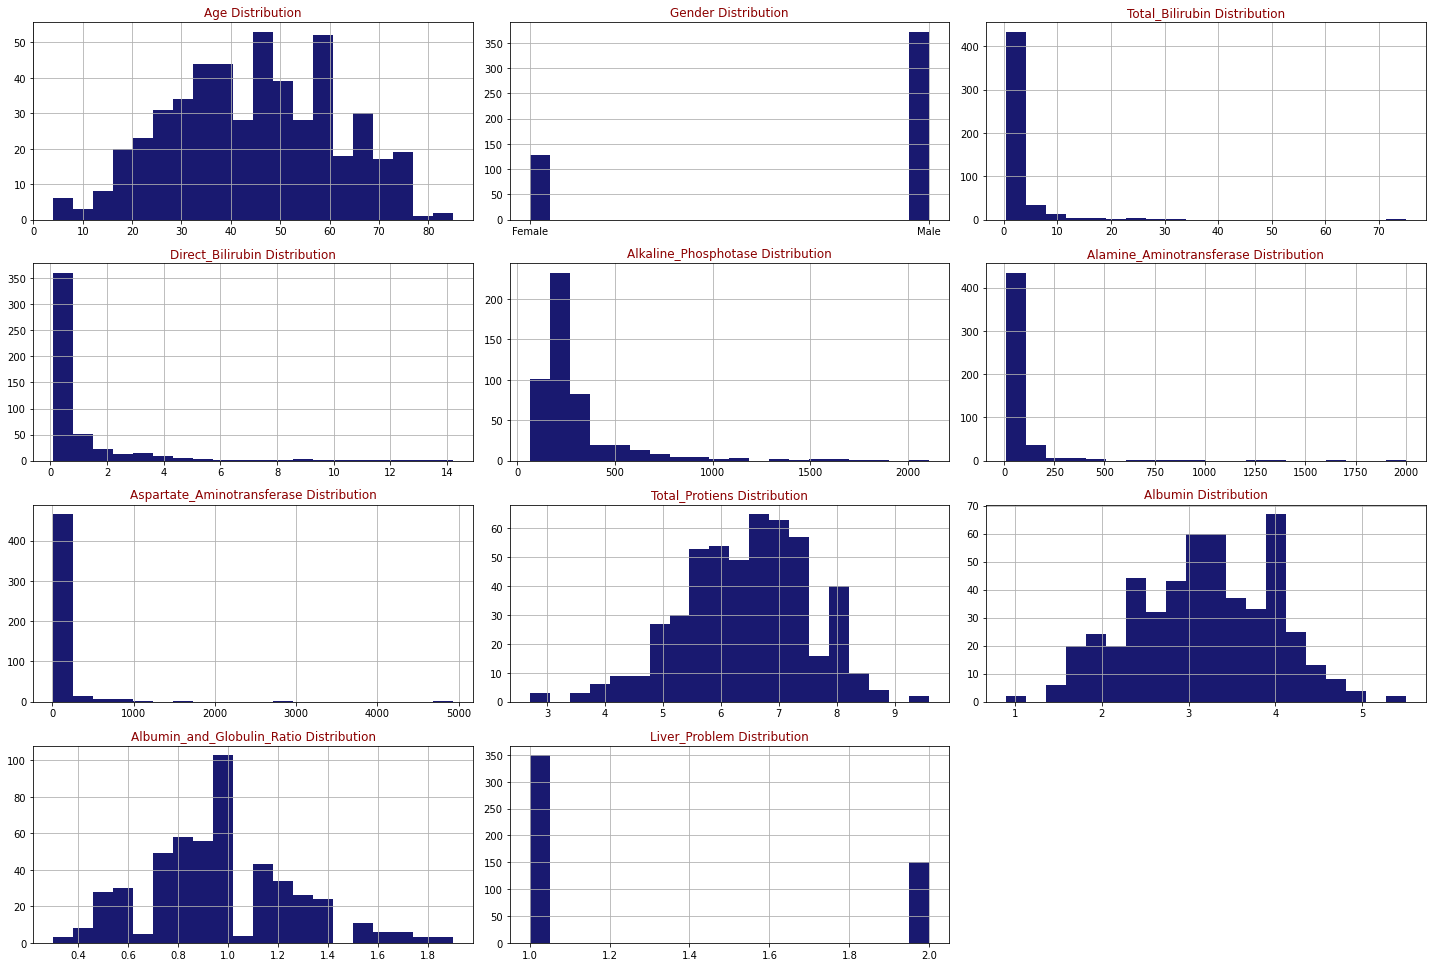

In [55]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(liver_data,liver_data.columns,6,3)


In [56]:
liver_data.Liver_Problem.value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

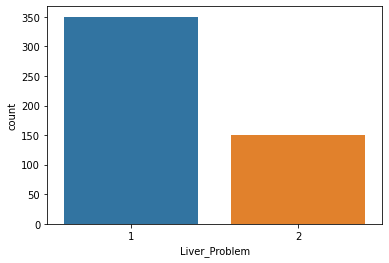

In [57]:
sn.countplot(x='Liver_Problem',data=liver_data)

In [58]:
cat_cols = liver_data.select_dtypes(include = 'object').columns    

liver_data[cat_cols] = liver_data[cat_cols].fillna(liver_data[cat_cols].mode().iloc[0]) 

In [59]:
liver_data.isnull().sum() / len(liver_data) * 100


Age                           0.0
Gender                        0.0
Total_Bilirubin               0.0
Direct_Bilirubin              0.0
Alkaline_Phosphotase          0.0
Alamine_Aminotransferase      0.0
Aspartate_Aminotransferase    0.0
Total_Protiens                0.0
Albumin                       0.0
Albumin_and_Globulin_Ratio    0.0
Liver_Problem                 0.0
dtype: float64

In [60]:
liver_data = pd.get_dummies(liver_data, columns=cat_cols) 

In [61]:
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [62]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Total_Bilirubin             500 non-null    float64
 2   Direct_Bilirubin            500 non-null    float64
 3   Alkaline_Phosphotase        500 non-null    int64  
 4   Alamine_Aminotransferase    500 non-null    int64  
 5   Aspartate_Aminotransferase  500 non-null    int64  
 6   Total_Protiens              500 non-null    float64
 7   Albumin                     500 non-null    float64
 8   Albumin_and_Globulin_Ratio  500 non-null    float64
 9   Liver_Problem               500 non-null    int64  
 10  Gender_Female               500 non-null    uint8  
 11  Gender_Male                 500 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 40.2 KB


In [63]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.5860,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.961220,1.300000,0.256000,0.744000
std,16.5334,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.293128,0.458717,0.436859,0.436859
min,4.0000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,32.7500,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.800000,1.000000,0.000000,0.000000
50%,45.0000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000,0.000000,1.000000
75%,58.0000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000,1.000000,1.000000
max,85.0000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000,1.000000,1.000000


In [68]:
import sklearn
X = liver_data.drop('Liver_Problem', axis = 1)
y = liver_data.Liver_Problem

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

In [66]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [69]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.66

In [74]:
pred = logreg.predict(X_test)

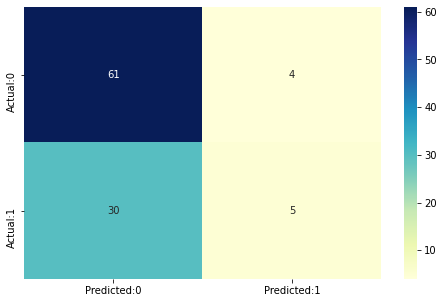

In [77]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()   
print(tn, fp, fn, tp)


61 4 30 5


In [79]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [81]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.66 
 The Missclassification = 1-Accuracy =  0.33999999999999997 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.14285714285714285 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9384615384615385 
 Positive Predictive value = TP/(TP+FP) =  0.5555555555555556 
 Negative predictive Value = TN/(TN+FN) =  0.6703296703296703 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2.321428571428571 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9133489461358315


In [90]:
y_pred_prob=logreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no LIVER PROBLEM (1)','Prob of LIVER PROBLEM (2)'])
y_pred_prob_df.head()

,Prob of no LIVER PROBLEM (1),Prob of LIVER PROBLEM (2)
0,0.637751,0.362249
1,0.650385,0.349615
2,0.596014,0.403986
3,0.702674,0.297326
4,0.912134,0.087866


In [92]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [93]:
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [99]:
cat_cols = test_new.select_dtypes(include = 'object').columns    

test_new[cat_cols] = test_new[cat_cols].fillna(test_new[cat_cols].mode().iloc[0]) 

In [101]:
test_new= pd.get_dummies(test_new, columns=cat_cols) 

In [102]:
test_new.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,36,2.8,1.5,305,28,76,5.9,2.5,0.7,0,1
1,42,0.8,0.2,127,29,30,4.9,2.7,1.2,0,1
2,53,19.8,10.4,238,39,221,8.1,2.5,0.4,0,1
3,32,30.5,17.1,218,39,79,5.5,2.7,0.9,0,1
4,32,32.6,14.1,219,95,235,5.8,3.1,1.1,0,1


In [103]:
Liver_Problem = logreg.predict(test_new)

In [104]:
res = pd.DataFrame(Liver_Problem)
res.index = test_new.index
res.columns = ['Liver_Problem']
from google.colab import files
res.to_csv('prediction_results_HP.csv')
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>